# 8: Discriptive statistics, Estimation


 #### [Back to main page](https://petrosyan.page/fall2020math3215)


### Box plots

Below we display the blox plot of the following data:

$$\{-30,-1, -5, -0.5, 0.5, 0.6, 0, 2, 3, 4.6, 4, 7, 18, 35\}.$$

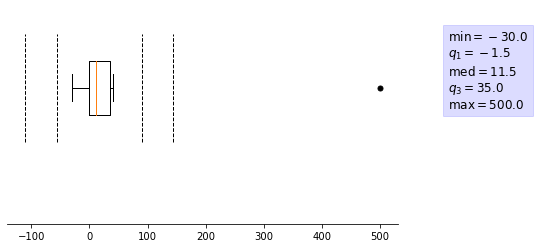

In [119]:
# nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np

# set up the figure
fig, ax = plt.subplots(1,1, figsize=(7,4))

# data
data = np.array([-30, -5,  9, 10, 13, 20, 40, 500]).astype(float)
# data = np.array([-30,-1, -5, -0.5, 0.5, 0.6, 0, 2, 3, 4.6, 4, 7, 18, 35]).astype(float)


def percentile(data, p):
    """
    Compute the percentiles the way we defined in class 
    data : array of size N 
    p : percentile
    """
    data = np.sort(data, axis=0)
    rank = int(p * (data.shape[0] + 1) - 1) # the rank
    assert rank > 0, "the rank does not exist" 
    alpha = p * (data.shape[0] + 1) - 1 - rank # the fractional part
    return data[rank] + alpha * (data[rank + 1] - data [rank])

def box_plot(ax, data, width=0.4, showout = True, position = np.array([0.4])):
    """
    ax : matplotlib ax
    data : the data 
    width : box width
    showout : show the outliers   
    position: the y axis of the box plot
    """
    # compute the five number summary 
    minim = np.min(data)
    maxim = np.max(data)
    q1 = percentile(data, 0.25)
    q2 = np.median(data)
    q3 = percentile(data, 0.75)

    # interquartile range
    iqr = q3 - q1

    # inner fences
    left_innerfence = q1 - 1.5 * iqr
    right_innerfence = q3 + 1.5 * iqr

    # compute outliers 
    outliers = data[np.logical_or(data <left_innerfence, data >= right_innerfence)]
    
    # whiskers
    if showout==True:
        low_whisker = np.min(data[data >= left_innerfence])
        high_whisker = np.max(data[data <= right_innerfence])
    else:
        low_whisker = np.min(data)
        high_whisker = np.max(data)



    stats = [{'iqr': iqr,
              'whishi': high_whisker,
              'whislo': low_whisker,
              'fliers': outliers,
              'q1': q1,
              'med': q2,
              'q3': q3}]

    # add the box plot
    flierprops = dict(markerfacecolor='black', markersize=5)
    ax.bxp(stats, vert = False, widths=width, positions = position, 
           flierprops=flierprops, showfliers=showout)

    # add Tukey's fences
    if showout==True:
        ax.vlines(q1-1.5*iqr, position-0.2,position+0.2, linestyle="dashed", linewidth=1)
        ax.vlines(q3+1.5*iqr, position-0.2,position+0.2, linestyle="dashed", linewidth=1)

        ax.vlines(q1-3*iqr, position-0.2,position+0.2, linestyle="dashed", linewidth=1)
        ax.vlines(q3+3*iqr, position-0.2,position+0.2, linestyle="dashed", linewidth=1)

    #  
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_ylim(-0.1,position+0.3)
    ax.set_yticks([])
    plt.figtext(1,0.8,
                r"$\min={:.4}$".format(minim)+"\n"+
                r"$q_1={:.4}$".format(q1)+"\n"+
                r"med$={:.4}$".format(q2)+"\n"+
                r"$q_3={:.4}$".format(q3)+"\n"+
                r"max$={:.4}$".format(maxim),
                ha="left", va="top",
                backgroundcolor=(0.1, 0.1, 1, 0.15),
                fontsize="large")
    
def disp_data(ax, data):
    ax.scatter(data, np.zeros(data.shape), zorder=2, s=10)
    ax.set_yticks([])
#     ax.set_xticks([])
    mean = np.mean(data)
    ax.scatter(mean, 0, zorder=2, s=20, color="red")
    ax.set_ylim(-0.01,0.1)
    ax.axhline(y=0, color='k', zorder=1, linewidth=0.5)

    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    ax.set_ylim(-0.1,1.5)
            
box_plot(ax, data, width=0.2, showout=True)

plt.show();

## Ordinary least squares regression

The following data is taken from [here](https://people.sc.fsu.edu/~jburkardt/datasets/regression/x03.txt). The dataset contains systolic blood pressure for 30 people of different ages.

In [112]:
# nbi:hide_in
import pandas as pd 
from IPython.display import display, HTML
display(HTML("<style>.container { width:61% !important; }</style>"))

pdata=pd.DataFrame.transpose(pd.read_csv('files/blood_pressure.csv').astype(int))
display(HTML(pdata.to_html(header=False)))

Age,39,47,45,47,65,46,67,42,67,56,64,56,59,34,42,48,45,17,20,19,36,50,39,21,44,53,63,29,25,69
SDP,144,220,138,145,162,142,170,124,158,154,162,150,140,110,128,130,135,114,116,124,136,142,120,120,160,158,144,130,125,175


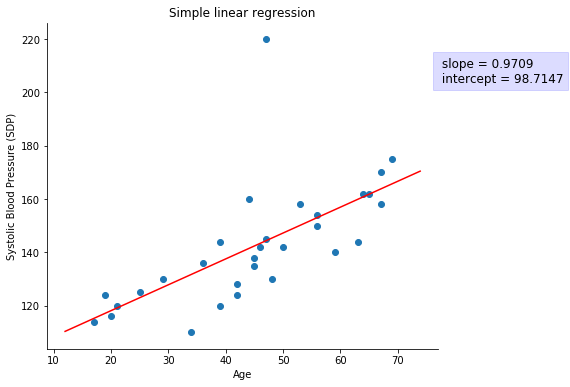

In [54]:
# nbi:hide_in
import numpy as np
import matplotlib.pyplot as plt

# plot setup
plt.figure(figsize=(7,6)) 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# load data from a csv file
data = np.genfromtxt('files/blood_pressure.csv', delimiter=',')[1:,:]
age = data[:,0]
sbp = data[:,1]

# the least squares line
meanx = np.mean(age)
meany = np.mean(sbp)
varx = np.var(age)
# cov = np.cov(age, sbp)[0,1]
cov = np.inner(age-meanx, sbp-meany)/age.shape[0]

xvals = np.arange(np.min(age)-5, np.max(age)+5, 0.1)
yvals = cov*(xvals - meanx)/varx + meany

slope = cov / varx
intercept = meany - cov*meanx / varx

plt.xlabel("Age")
plt.ylabel("Systolic Blood Pressure (SDP)")
plt.plot(xvals, yvals, c="r", zorder=1)

plt.figtext(0.9,0.8, " slope = {:.4f}".format(slope) +
            "\n intercept = {:.4f}".format(intercept),
            ha="left", va="top",
            backgroundcolor=(0.1, 0.1, 1, 0.15), fontsize="large")
plt.title("Simple linear regression")
plt.scatter(age, sbp, zorder=0);

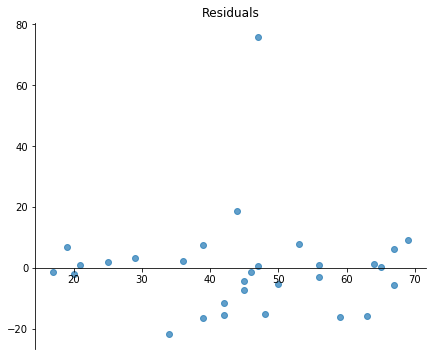

In [50]:
# nbi:hide_in
import numpy as np
import matplotlib.pyplot as plt

# plot setup
plt.figure(figsize=(7,6)) 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# load data from a csv file
data = np.genfromtxt('files/blood_pressure.csv', delimiter=',')[1:,:]
age = data[:,0]
sbp = data[:,1]

# the least squares line
meanx = np.mean(age)
meany = np.mean(sbp)
varx = np.var(age)
cov = np.inner(age-meanx, sbp-meany)/age.shape[0]

res = sbp - cov*(age - meanx)/varx - meany

plt.gca().spines['bottom'].set_position(('data',0))
plt.title("Residuals")
plt.scatter(age, res, zorder=0, alpha=0.7);

## MLE linear regression for synthetic data

True valus are $a=-2, b = 1$ and $\sigma^2=0.04$.

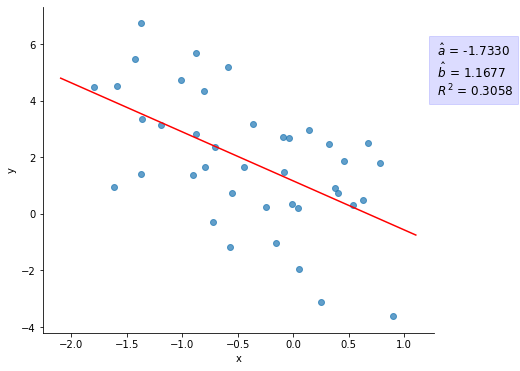

In [85]:
# nbi:hide_in
import numpy as np
import matplotlib.pyplot as plt

# plot setup
plt.figure(figsize=(7,6)) 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# true parameters
a = -2
b = 1
sigma = 2
numData = 40

# generate data
x = np.random.rand(numData)*(b-a)+a
y = a * x + b
eps = np.random.randn(x.shape[0])*sigma
y = y + eps

# the least squares line
meanx = np.mean(x)
meany = np.mean(y)
varx = np.var(x)
vary = np.var(y)
cov = np.inner(x-meanx, y-meany)/x.shape[0]

# MLE 
aMLE = cov / varx
bMLE = meany - cov*meanx / varx
res = y - cov*(x - meanx)/varx - meany
varMLE = np.var(res)
R2 = 1 -  varMLE / vary


# MLE line
xvals = np.arange(np.min(x)-0.3, np.max(x)+0.3, 0.1)
yvals = cov*(xvals - meanx)/varx + meany

plt.xlabel("x")
plt.ylabel("y")
plt.figtext(0.9,0.8, r" $\hat a$ = {:.4f}".format(aMLE) +
            "\n $\hat b$ = {:.4f}\n".format(bMLE) +
#             r" $\hat\sigma^2$ = {:.4f}".format(varMLE) + "\n"
            r" $R^2$ = {:.4f}".format(R2),
            ha="left", va="top",
            backgroundcolor=(0.1, 0.1, 1, 0.15), fontsize="large")
plt.plot(xvals, yvals, c="r", zorder=1)
plt.scatter(x, y, zorder=0, alpha=0.7);